In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import math 
from ast import literal_eval
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp  /content/drive/MyDrive/Updated_Dateset_v5.zip /content/

In [ ]:
!unzip  Updated_Dateset_v5.zip

Archive:  Updated_Dateset_v5.zip
  inflating: cdn_final_final.csv     
  inflating: cloud_final_final.csv   
  inflating: hosting_final_final.csv  
  inflating: proxy_final_final.csv   
  inflating: vpn_final_final.csv     


In [ ]:
sample_size = 30000
df = pd.read_csv('cdn_final_final.csv')
#df['vendor']= ['cdn' for x in range(df.shape[0])]
df = df.sample(n = sample_size)
df1 = pd.read_csv('cloud_final_final.csv')
#df1['vendor']= ['cloud' for x in range(df1.shape[0])]
df1 = df1.sample(n = sample_size)
df2 = pd.read_csv('hosting_final_final.csv')
#df2['vendor']= ['hosting' for x in range(df2.shape[0])]
df2 = df2.sample(n = sample_size)
df3 = pd.read_csv('vpn_final_final.csv')
#df3['vendor']= ['vpn' for x in range(df3.shape[0])]
#df3 = df3.sample(n = 15000)
df4 = pd.read_csv('proxy_final_final.csv')
#df4 = df4.sample(n = 9200)

df = df.append([df1,df2,df3,df4],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.columns

Index(['ip', 'No Of Owners', 'CIDR', 'netType', 'Organization',
       'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server.0',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.unknown.0.key',
       'data.http.result.response.headers.unknown.0.value.0',
       'data.http.result.response.headers.connection.0',
       'data.http.result.response.headers.via.0',
       'data.http.result.response.headers.unknown.1.key',
       'data.http.result.response.headers.unknown.1.value.0',
       'data.http.result.response.headers.accept_ranges.0',
       'data.http.result.response.headers.cache_control.0',
       'data.http.result.response.headers.retry_after.0',
       'data.http.result.response.body',
       'data.http.result.response.body_sha256',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type.0',
       'data.http.result.response.headers.location.0',
   

In [ ]:
renameDict = {
       'data.http.result.response.headers.server.0':'data.http.result.response.headers.server',
       'data.http.result.response.headers.connection.0':'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via.0':'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges.0': 'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control.0':'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after.0':'data.http.result.response.headers.retry_after',
       'data.http.result.response.headers.content_type.0':'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location.0': 'data.http.result.response.headers.location',
       'data.http.result.redirect_response_chain.0.status_line':'data.http.result.redirect_response_chain.status_line',
       'data.http.result.response.headers.etag.0':'data.http.result.response.headers.etag',
       'data.http.result.response.headers.last_modified.0':'data.http.result.response.headers.last_modified',
       'data.http.result.response.headers.vary.0':'data.http.result.response.headers.vary',
       'data.http.result.response.transfer_encoding.0': 'data.http.result.response.transfer_encoding',
       'data.http.result.response.headers.x_powered_by.0':'data.http.result.response.headers.x_powered_by',
       'data.http.result.response.headers.pragma.0':'data.http.result.response.headers.pragma',
       'data.http.result.redirect_response_chain.0.headers.server.0':'data.http.result.redirect_response_chain.headers.server'
}

In [ ]:
df.rename(columns=renameDict, errors="raise",inplace=True)

In [ ]:
catfields = [ 'netType', 
              #'Organization',
              'data.http.result.response.headers.server',
               'data.http.result.response.status_code',
              'data.http.result.response.headers.connection',
              'data.http.result.response.headers.via',
              'data.http.result.response.headers.accept_ranges',
              'data.http.result.response.headers.cache_control',
              'data.http.result.response.headers.retry_after',
             # 'data.http.result.response.body',
             # 'data.http.result.response.body_sha256',
              'data.http.result.response.headers.content_type',
              'data.http.result.response.headers.location',
             # 'data.http.result.redirect_response_chain.status_line',
              'data.http.result.response.headers.etag',
              #'data.http.result.response.headers.vary',
              #'data.http.result.response.transfer_encoding',
             # 'data.http.result.response.headers.x_powered_by',
              #'data.http.result.response.headers.pragma',
              'as_name', 'as_no',
              'data.tls.status',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization',
              'vendor'
       ]

In [ ]:
df[df["vendor"] == 'proxy']['data.http.result.response.headers.cache_control'].value_counts()

no-cache                                                                      29
no-store, no-cache, must-revalidate, post-check=0, pre-check=0                13
no-cache, no-store, must-revalidate                                           11
no-store, no-cache, must-revalidate                                           10
private                                                                       10
no-store                                                                       4
no-cache, private                                                              4
max-age=0                                                                      4
no-cache, no-store, max-age=0                                                  3
no-cache,no-store                                                              3
no-cache, must-revalidate                                                      2
no-cache, public                                                               2
max-age=3600,public         

In [ ]:
#df[''].value_counts()

In [ ]:
def getgeneralCloudfront(x):
  if('(CloudFront)' in str(x)):
      return 'CloudFront'
  else:
      return x

def getgeneralServerNames(x):
  if('nginx' in str(x)):
      return 'nginx'
  elif('Apache' in str(x)):
      return 'Apache'
  else:
      return x

def getgeneralphp(x):
  if (pd.isna(x)):
    return -1
  else:
    if('PHP' in x):
      return 'PHP'

def changenullaszero(x):
  if (pd.isna(x)): 
    return -1
  else:
    return 1

def getCIDRBlockLength(ipadd):
   if(pd.isna(ipadd)):
     return 0
   else:
      if(len(ipadd.split(','))==1):
        return (2**(32-int(ipadd.split('/')[1])))
      else:
        sum=0
        for i in ipadd.split(','):
          sum=sum + (2**(32-int(i.split('/')[1])))
        return sum 

def arrayLiteral(stringarray):
  if(pd.isna(stringarray)):
     return 0
  return len(literal_eval(stringarray))

def removeSquareBrackets(text):
  if(pd.isna(text)):
     return -1
  return literal_eval(text)[0];

def featureImportance(clf):
    importance = clf.feature_importances_
    importancelist = []
    for i,v in enumerate(importance):
      importancelist.append([df.columns[i],v])
    importantdf = pd.DataFrame(importancelist)
    importantdf.columns = ['Feature','Importance']
    importantdf = importantdf.sort_values(by=['Importance'],ascending=False)
    importantdf = importantdf[::-1]
    print(importantdf)
    fig = importantdf.plot.barh(x='Feature', y='Importance', rot=0,figsize=(5,10),title = 'Overall Feature Importance')

In [ ]:
#df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(getgeneralCloudfront)
df['data.http.result.response.status_code'].fillna(-1, inplace=True)
df['data.http.result.response.headers.pragma'].fillna(-1, inplace=True)
df['data.http.result.response.headers.connection'].fillna(-1, inplace=True)
df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(changenullaszero)
df['data.http.result.response.headers.via'].fillna(-1, inplace=True)
df['data.http.result.response.headers.accept_ranges'].fillna(-1, inplace=True)
df['data.http.result.response.headers.cache_control'].fillna(-1, inplace=True)
df['data.http.result.response.headers.retry_after'].fillna(-1, inplace=True)
df['data.http.result.response.body']  = df["data.http.result.response.body"].apply(changenullaszero)
df['data.http.result.response.body_sha256']  = df['data.http.result.response.body_sha256'].apply(changenullaszero)
df['data.http.result.response.content_length'].fillna(0, inplace=True)
df['data.http.result.response.headers.content_type'].fillna(-1, inplace=True)
df['data.http.result.response.headers.location'] = df['data.http.result.response.headers.location'].apply(changenullaszero)
df['data.http.result.redirect_response_chain.status_line'].fillna(-1, inplace=True)
df['data.http.result.response.headers.etag'] = df['data.http.result.response.headers.etag'].apply(changenullaszero)
df['data.http.result.response.headers.last_modified']  = df['data.http.result.response.headers.last_modified'].apply(changenullaszero)
df['data.http.result.response.headers.vary'].fillna(-1, inplace=True)
df['data.http.result.response.transfer_encoding'].fillna(-1, inplace=True)
df['data.http.result.response.headers.x_powered_by']  = df['data.http.result.response.headers.x_powered_by'].apply(getgeneralphp)
#df['data.http.result.response.headers.x_powered_by'].fillna(-1, inplace=True)

df['data.http.result.response.headers.server']  = df['data.http.result.response.headers.server'].apply(getgeneralServerNames)
df['data.http.result.response.headers.server'].fillna(-1, inplace=True)

In [ ]:
df['netSize']  = df["CIDR"].apply(getCIDRBlockLength)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].apply(removeSquareBrackets)
df['SAN Count']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'].apply(arrayLiteral)

In [ ]:
df['Organization'].fillna(-1, inplace=True)
df['netType'].fillna(-1, inplace=True)
df['No of Who is Records'].fillna(0, inplace=True)
df['Most Recent Update'].fillna(0, inplace=True)

In [ ]:
# df['Organization'] = le.fit_transform(df['Organization'].astype(str))
# df['netType'] = le.fit_transform(df['netType'].astype(str))

# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].astype(str))
# df['data.tls.status'] = le.fit_transform(df['data.tls.status'].astype(str))

In [ ]:
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'],axis=1)
df = df.drop(['No Of Owners'],axis=1)
df = df.drop(['CIDR'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.value.0'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.value.0'],axis=1)
df = df.drop(['ip'],axis=1)
df = df.drop(['Unnamed: 0_y'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'],axis=1)


#Reducing the Insignificant Features
df = df.drop(['data.http.result.response.transfer_encoding'],axis=1)
df = df.drop(['data.http.result.response.headers.x_powered_by'],axis=1)
df = df.drop(['data.http.result.response.headers.pragma'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.headers.server'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.status_line'],axis=1)
df = df.drop(['data.http.result.response.headers.last_modified'],axis=1)
df = df.drop(['data.http.result.response.body_sha256'],axis=1)
df = df.drop(['data.http.result.response.headers.vary'],axis=1)
df = df.drop(['data.http.result.response.body'],axis=1)

df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'],axis=1)

#Unsure Significant Features
df = df.drop(['Organization'],axis=1)

In [ ]:
df.columns

Index(['netType', 'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location',
       'data.http.result.response.headers.etag', 'as_name', 'as_no',
       'data.tls.status',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality',
       'data.tls.

In [ ]:
# import datetime

In [ ]:
df[df["vendor"] == "cloud"]['data.tls.status'].value_counts()

success               23876
io-timeout             5600
unknown-error           468
connection-timeout       56
Name: data.tls.status, dtype: int64

In [ ]:
# val = 7.794858e+08
# value = datetime.datetime.fromtimestamp(val)
# print(f"{value:%Y-%m-%d}")

In [ ]:
categoricalDf = df[catfields]
df.drop(catfields, axis=1, inplace=True)
df

,Most Recent Update,No of Who is Records,data.http.result.response.content_length,netSize,SAN Count
0,1.585613e+09,1.0,915.0,262144,2
1,1.586218e+09,3.0,0.0,131072,2
2,1.487946e+09,2.0,0.0,16777216,37
3,0.000000e+00,0.0,915.0,0,0
4,1.375056e+09,1.0,249.0,65536,11
...,...,...,...,...,...
121048,1.472602e+09,1.0,0.0,16,0
121049,1.488331e+09,2.0,0.0,16777216,0
121050,1.521072e+09,1.0,0.0,16777216,0
121051,1.363599e+09,2.0,0.0,16777216,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
import collections
#df = df.astype(str).apply(LabelEncoder().fit_transform)

In [ ]:
encoder_dict = collections.defaultdict(LabelEncoder)
categoricalDfEncoded = categoricalDf.astype(str).apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [ ]:
with open('label_encodings','wb') as f:
  pickle.dump(encoder_dict,f)

In [ ]:
vendorEncodings = encoder_dict['vendor'].classes_

In [ ]:
categoricalDfEncoded

,netType,data.http.result.response.headers.server,data.http.result.response.status_code,data.http.result.response.headers.connection,data.http.result.response.headers.via,data.http.result.response.headers.accept_ranges,data.http.result.response.headers.cache_control,data.http.result.response.headers.retry_after,data.http.result.response.headers.content_type,data.http.result.response.headers.location,data.http.result.response.headers.etag,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,vendor
0,11,65,14,7,1,0,0,0,45,0,0,92,569,2,74,51,1,11,0
1,12,1,0,0,0,0,0,0,2,0,0,92,569,2,74,51,1,11,0
2,4,1,0,0,0,0,0,0,2,0,0,567,2645,2,74,376,1,11,0
3,0,65,14,7,1,0,0,0,45,0,0,92,569,3,1,4,1,11,0
4,10,361,28,7,1,1,214,1,45,0,0,996,2484,2,11,279,1018,1100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121048,12,1,0,0,0,0,0,0,2,0,0,666,2785,0,1,4,1,11,3
121049,1,1,0,0,0,0,0,0,2,0,0,471,310,0,1,4,1,11,3
121050,3,1,0,0,0,0,0,0,2,0,0,712,1499,0,1,4,1,11,3
121051,1,1,0,0,0,0,0,0,2,0,0,2224,2149,0,1,4,1,11,3


In [ ]:
df[catfields] = categoricalDfEncoded

In [ ]:
renameDict = {
       'data.http.result.response.headers.via':'Via',
       'data.http.result.response.content_length': 'Content_Length',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization':'Certificate_Issuer_Org',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country':'Certificate_Issuer_Country',
       'data.http.result.response.status_code':'Status_Code',
       'data.http.result.response.headers.server': 'Server',
       'data.http.result.response.headers.connection':'Connection',
       'data.http.result.response.headers.content_type':'Content_Type',
       'data.http.result.response.headers.cache_control':'Cache_control',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality':'X.509_Subject_Locality',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization':'X.509_Subject _Org',
       'data.http.result.response.headers.accept_ranges':'Accept_Ranges',
       'data.http.result.response.headers.retry_after':'Retry_After',
       'data.http.result.response.headers.location':'Location',
       'data.http.result.response.headers.etag':'Etag'
}

In [ ]:
df.rename(columns=renameDict, errors="raise",inplace=True)

In [ ]:
#df = df.dropna(subset=['SAN Count'])

In [ ]:
df[df["vendor"] == 4]['SAN Count'].describe()

count    21853.000000
mean         2.647325
std          7.159677
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        246.000000
Name: SAN Count, dtype: float64

In [ ]:
field = 'netSize'
binamount = 500

In [ ]:
#df = df.dropna(subset=[field])

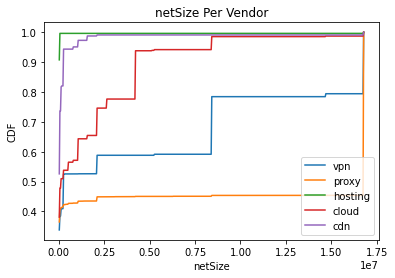

In [ ]:
count, bins_count  = np.histogram(df[df["vendor"] == 4][field].values, bins=binamount)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=encoder_dict['vendor'].classes_[4])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 3][field].values, bins=binamount)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=encoder_dict['vendor'].classes_[3])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 2][field].values, bins=binamount)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=encoder_dict['vendor'].classes_[2])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 1][field].values, bins=binamount)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=encoder_dict['vendor'].classes_[1])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 0][field].values, bins=binamount)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=encoder_dict['vendor'].classes_[0])
plt.legend()
plt.title(field+' Per Vendor')
plt.ylabel('CDF')
plt.xlabel(field)
plt.savefig(field+' Per Vendor.png')

In [ ]:
# count, bins_count  = np.histogram(df[df["vendor"] == 4][field].values, bins=10000)
# pdf = count / sum(count)
# cdf = np.cumsum(pdf)
# plt.plot(bins_count[1:], cdf, label=le.classes_[4])
# plt.legend()

# count, bins_count  = np.histogram(df[df["vendor"] == 3][field].values, bins=10000)
# pdf = count / sum(count)
# cdf = np.cumsum(pdf)
# plt.plot(bins_count[1:], cdf, label=le.classes_[3])
# plt.legend()

# count, bins_count  = np.histogram(df[df["vendor"] == 2][field].values, bins=10000)
# pdf = count / sum(count)
# cdf = np.cumsum(pdf)
# plt.plot(bins_count[1:], cdf, label=le.classes_[2])
# plt.legend()

# count, bins_count  = np.histogram(df[df["vendor"] == 1][field].values, bins=10000)
# pdf = count / sum(count)
# cdf = np.cumsum(pdf)
# plt.plot(bins_count[1:], cdf, label=le.classes_[1])
# plt.legend()

# count, bins_count  = np.histogram(df[df["vendor"] == 0][field].values, bins=10000)
# pdf = count / sum(count)
# cdf = np.cumsum(pdf)
# plt.plot(bins_count[1:], cdf, label=le.classes_[0])
# plt.legend()
# plt.title('CDF of No of Whois Records Per Vendor')
# plt.ylabel('CDF')
# plt.xlabel('# of Whois Records')

# count, bins_count  = np.histogram(df[field].values, bins=1000)
# pdf = count / sum(count)
# cdf = np.cumsum(pdf)
# plt.plot(bins_count[1:], cdf, label = "Whole Dataset")
# plt.legend()
# plt.title(field)
# plt.ylabel('CDF')
# plt.xlabel('Content Length')
# plt.xlim(0,10000)
# plt.savefig('HTTP Content Length Merged.png')

In [ ]:
encoder_dict['vendor'].classes_

array(['cdn', 'cloud', 'hosting', 'proxy', 'vpn'], dtype=object)

In [ ]:
df[df["vendor"] == 2]['SAN Count'].describe()

count    30000.00000
mean         5.20280
std         13.57525
min          0.00000
25%          2.00000
50%          2.00000
75%          8.00000
max       2073.00000
Name: SAN Count, dtype: float64